

# Exercice 6 - Regression lineaire multiple et inference statistique
### (suite de l'exercice 5)


Dans le problème suivant, on considère que l'on connait les notes sur l'année de n élèves dans p matières, ainsi que leurs notes à un concours specifique en fin d'année. L'année suivante, on se demande si on ne pourrait pas prédire la note des étudiants au concours en fonction de leur moyenne annuelle afin d'estimer leurs chances au concours.

On va résoudre le problème à l'aide de la regression linéaire multiple de scikitlearn (et plus à la main) et estimer à quel point les prédictions sont précises par inference statistique.



In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


## Partie 1 -- Apprentissage/prédiction :

### <span style = "color: #10AAEA">Questions 1</span>

- Bien comprendre la fonction 'SimulateObservations2'
- A l'aide de la fonction 'SimulateObservations2', simulez un jeu de données d'apprentissage [X_l,y_l] avec n_l=30 observations et un jeu de test [X_t,y_t] avec n_t=1000 observations. Les observations seront en dimension p=10.
- Effectuez la régression linéaire multiple avec sklearn.linear_model.LinearRegression
- Représentez un nuage de points dont chaque point a pour coordonnée (y_true,y_predicted). Les observations test seront utilisées. Calculez de même la 'mean squared error' sur ces données.  

### <span style = "color: #10AAEA">Réponses 1</span>



The thetas with which the values were simulated are: [0.10273298 0.04010769 0.0814315  0.15873217 0.03333717 0.04656801
 0.18732044 0.0250724  0.16154297 0.16315467]


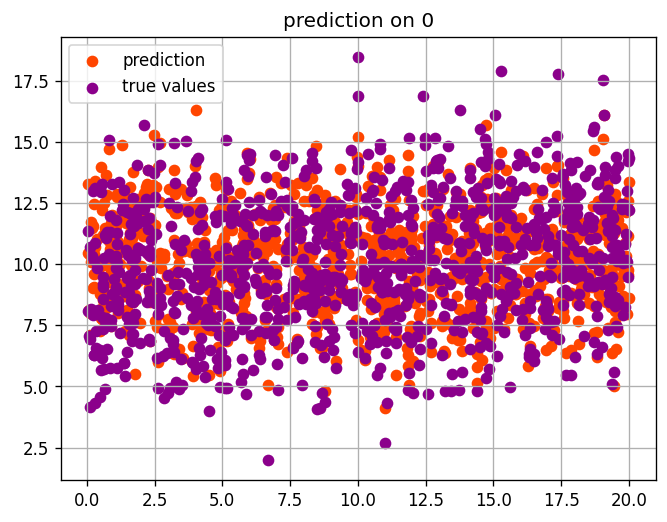

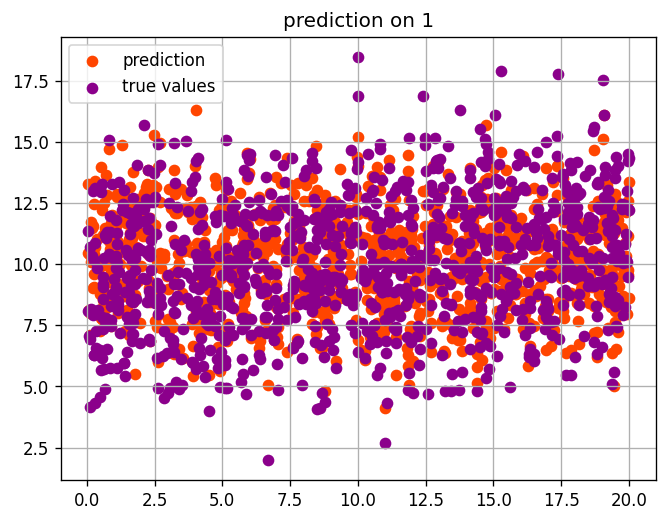

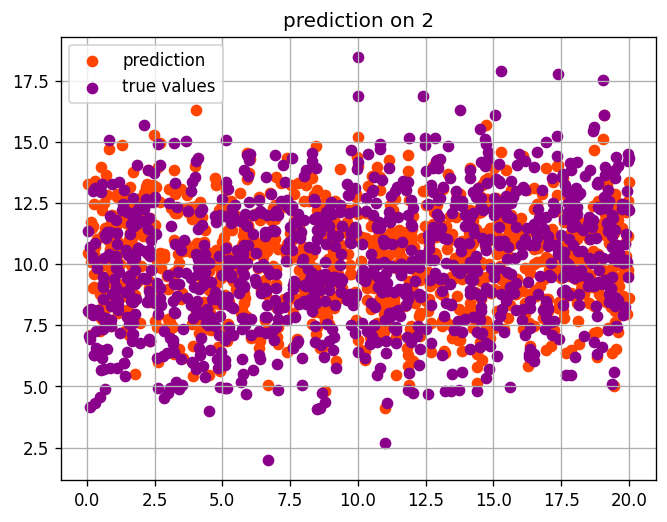

Mean square error for 30 #train is 2.885


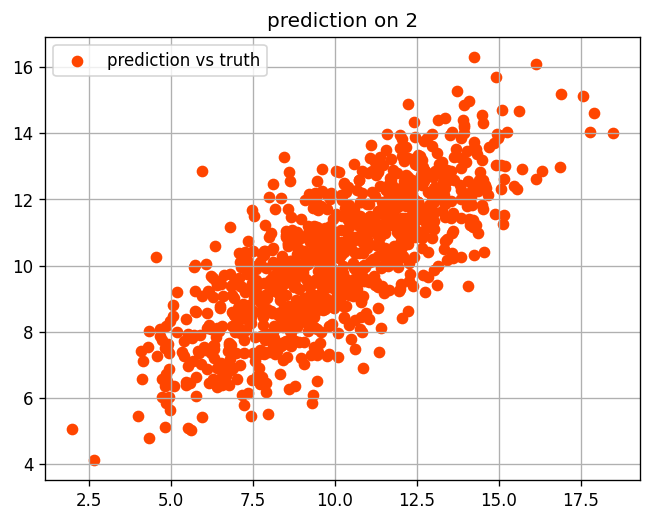

In [3]:

def SimulateObservations2(n_train, n_test, p):
  """
  n_train: number of training observations to simulate
  n_test: number of test observations to simulate
  p: dimension of the observations to simulate
  """
  
  # random test and train set
  ObsX_train = 20. * np.random.rand(n_train,p)
  ObsX_tst = 20. * np.random.rand(n_test,p)
  
  RefTheta = np.random.rand(p)
  RefTheta = RefTheta/RefTheta.sum()
  print("The thetas with which the values were simulated are: " + str(RefTheta))
  
  ObsY_train = np.dot(ObsX_train, RefTheta.reshape(p,1))   +   1.5 * np.random.randn(n_train,1)
  ObsY_tst = np.dot(ObsX_tst, RefTheta.reshape(p,1))   +   1.5 * np.random.randn(n_test,1)
  
  return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]

def s2(y_true, y_pred):
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / (n-1)


n_train = 30
n_test = 1000
p = 10
[X_l, y_l, X_t, y_t, RefTheta] = SimulateObservations2(n_train, n_test, p)

# linear regression and prediction
lr = LinearRegression()
lr.fit(X_l, y_l)
y_t_hat = lr.predict(X_t)

# plot results
for var in [0, 1, 2] :
  plt.figure(dpi=120)
  plt.scatter(X_t[:, 0], y_t_hat, color="orangered", label="prediction")
  plt.scatter(X_t[:, 0], y_t, color="darkmagenta", label="true values")
  plt.legend()
  plt.grid()
  plt.title(f'prediction on {var}')
  plt.show()

# error
msqr = s2(y_t, y_t_hat)
print(f"Mean square error for {n_train} #train is {round(msqr, 3)}")

plt.figure(dpi=120)
plt.scatter(y_t, y_t_hat, color="orangered", label="prediction vs truth")
plt.legend()
plt.grid()
plt.title(f'prediction on {var}')
plt.show()

## Partie 2 -- Inference sur les erreurs : 

On fait l'hypothèse que le bruit sur les observations est Gaussien (ce qui est vrai puisqu'on a simulé les données comme ça). Nous allons alors étudier comment les erreurs d'approximation sont distribuées.

### <span style = "color: #10AAEA">Questions 2</span>

- Utilisez les fonctions np.histogram et plt.plot pour représenter la distribution de l'erreur d'approximation dans les données de la partie 1.
- La distribution de l'erreur est liée à une loi de student à n-p-1 degres de libertés. Nous n'allons pas caler cette loi à nos données mais simplement mesurer la moyenne d'erreur au carré (MSE - ou biais) dans nos données pour évaluer à quel point notre méthode est précise.

### <span style = "color: #10AAEA">Réponses 2</span>


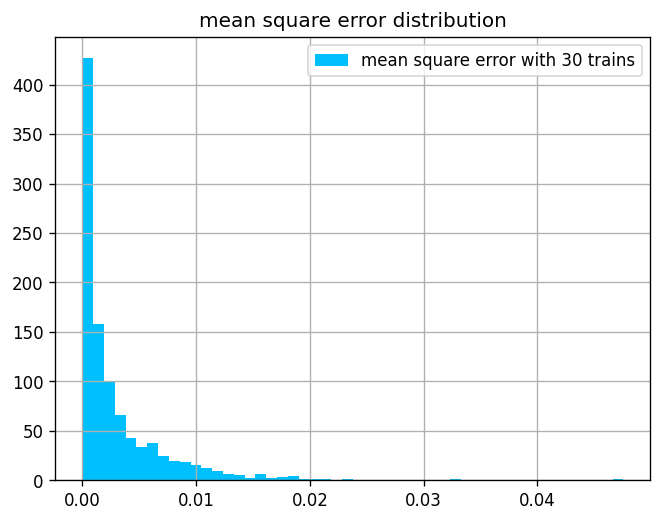

In [4]:
# compute error
err2 = (y_t - y_t_hat)**2 / (len(y_t)-1)
err2_hist, bins = np.histogram(err2, bins=[0.0001*k for k in range(30)])
err2_hist, bins = np.histogram(err2, bins=15, range=(0, 0.1))


""" repeat computation with more trainings """
# n_train = 200
# [X_l, y_l, X_t, y_t, RefTheta] = SimulateObservations2(n_train, n_test, p)
# # linear regression and prediction
# lr = LinearRegression()
# lr.fit(X_l, y_l)
# y_t_hat = lr.predict(X_t)
# # compute error
# err2_maxed = (y_t - y_t_hat)**2 / (len(y_t)-1)
# err2_maxed_hist, _ = np.histogram(err2_maxed, bins=15)

plt.figure(dpi=120)
plt.hist(err2, bins=50, color="deepskyblue", label=f"mean square error with {30} trains")
plt.legend()
plt.grid()
plt.title(f'mean square error distribution')
plt.show()


# plt.figure(dpi=120)
# plt.hist(err2_maxed_hist, color="royalblue", label=f"mean square error with {n_train} trains")
# plt.legend()
# plt.grid()
# plt.title(f'mean square error distribution')
# plt.show()



## Partie 3 -- Variations de l'erreur pour différentes valeurs de n ou p : 

### <span style = "color: #10AAEA">Question 3</span>

Reproduire les parties 1 et 2 de l'exercice pour différents nombres d'observations d'apprentissage (n) et différentes dimensions des observations (p) :
- *Tests 1* : (n=30,p=1) , (n=30,p=5) , (n=30,p=10) , (n=30,p=15) , (n=30,p=20) , (n=30,p=25) , (n=30,p=29)
- *Tests 2* : (n=11,p=10) ,(n=15,p=10) ,(n=20,p=10) ,(n=30,p=10) , (n=60,p=10) , (n=100,p=10)  

Aussi bien pour *Tests 1* que pour *Tests 2*, verifiez comment évolue la MSE quand n ou p varie.

### <span style = "color: #10AAEA">Réponse 3</span>


The thetas with which the values were simulated are: [0.22187468 0.11744848 0.37668332 0.03271184 0.25128168]
Mean square error for 10 #train is 3.93


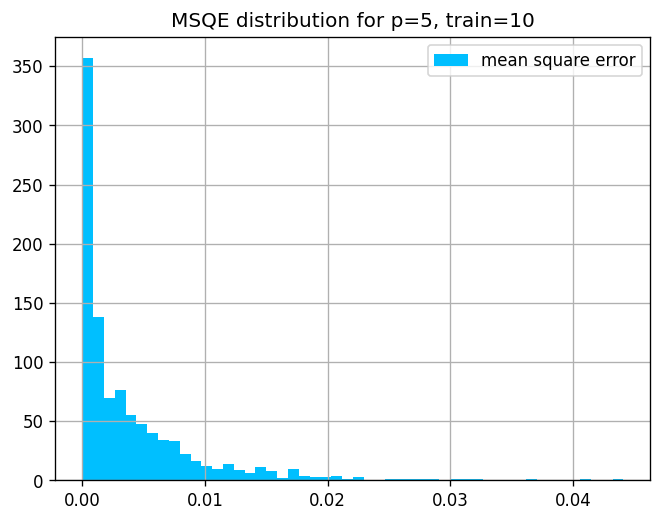

The thetas with which the values were simulated are: [0.26974144 0.19500253 0.09878932 0.31697709 0.11948961]
Mean square error for 40 #train is 2.691


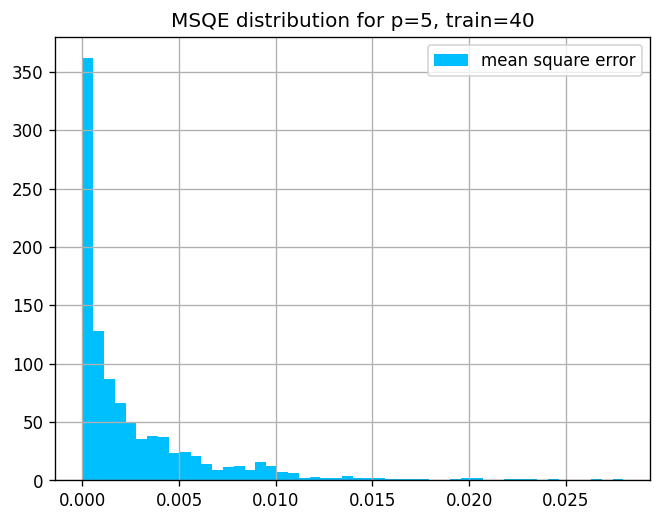

The thetas with which the values were simulated are: [0.21198602 0.04936244 0.26046212 0.11633041 0.361859  ]
Mean square error for 100 #train is 2.312


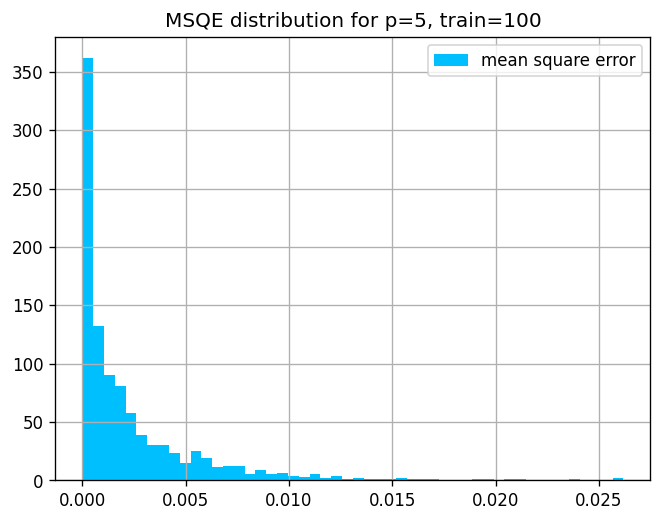

The thetas with which the values were simulated are: [0.06217954 0.14565264 0.21957647 0.23540304 0.3371883 ]
Mean square error for 200 #train is 2.452


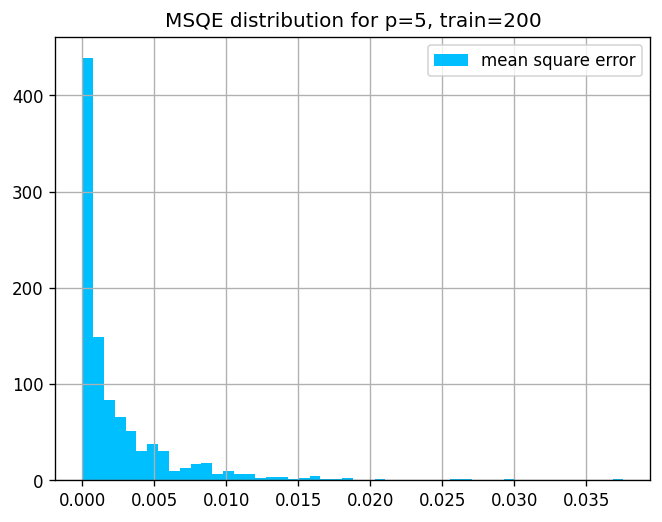

The thetas with which the values were simulated are: [0.11698495 0.04277394 0.06481929 0.18360848 0.088822   0.08951561
 0.26863909 0.09655058 0.01731966 0.0309664 ]
Mean square error for 10 #train is 31.679


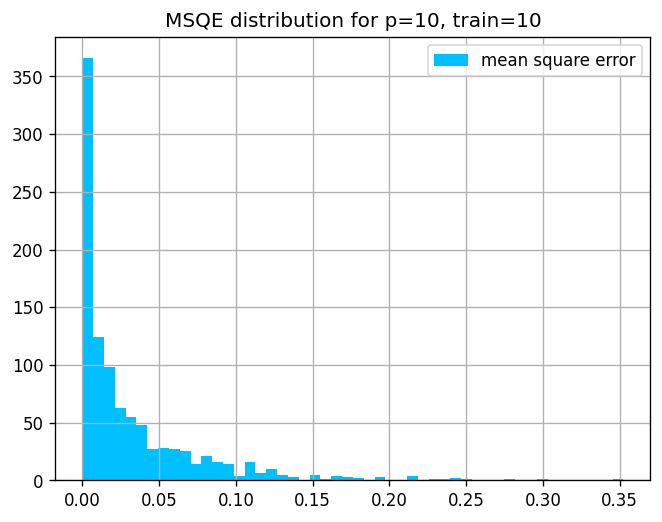

The thetas with which the values were simulated are: [0.08693057 0.0858313  0.08902223 0.00482695 0.11795591 0.13541309
 0.17387028 0.04565715 0.16637804 0.09411448]
Mean square error for 40 #train is 3.059


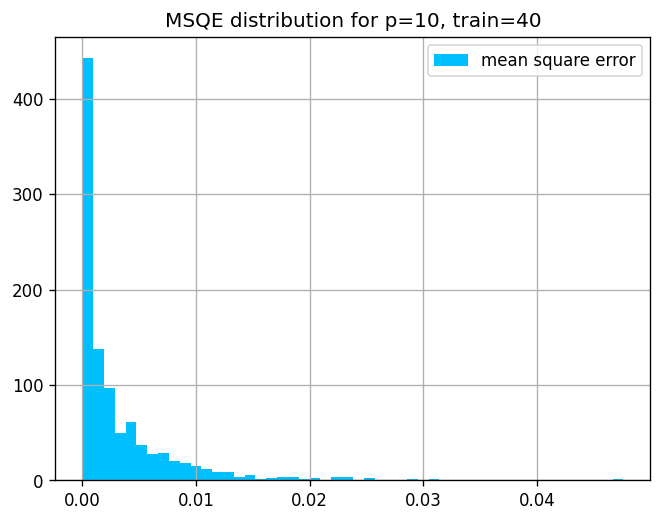

The thetas with which the values were simulated are: [0.12675092 0.07968215 0.07401302 0.14356054 0.01681265 0.00595215
 0.03047813 0.13687236 0.17891122 0.20696686]
Mean square error for 100 #train is 2.43


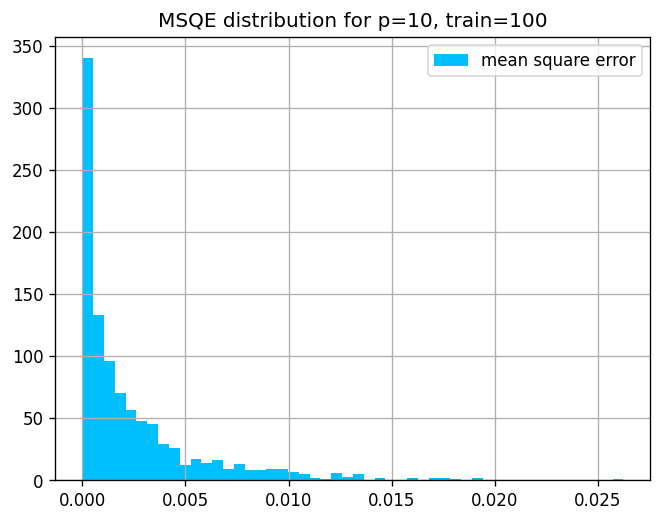

The thetas with which the values were simulated are: [0.11526468 0.02021865 0.14019431 0.10688624 0.05390093 0.0528807
 0.16502564 0.17768239 0.13603115 0.0319153 ]
Mean square error for 200 #train is 2.453


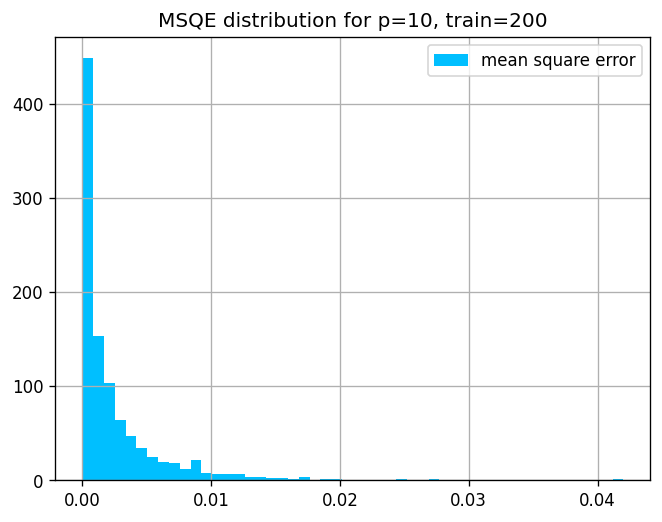

The thetas with which the values were simulated are: [0.02962758 0.09462691 0.04191504 0.08966108 0.10206209 0.00938086
 0.00269228 0.06334685 0.04747305 0.10515601 0.01348201 0.01631203
 0.10500507 0.01593621 0.07111297 0.05328192 0.01010976 0.03707653
 0.06021266 0.0315291 ]
Mean square error for 10 #train is 5.391


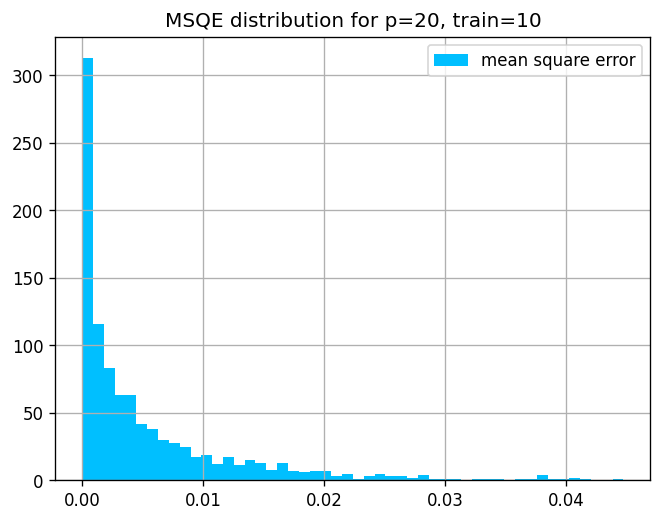

The thetas with which the values were simulated are: [0.03446121 0.03241787 0.07490431 0.05616899 0.00108733 0.015666
 0.0013309  0.06047842 0.10364091 0.03010183 0.01597538 0.10177561
 0.09394253 0.06014779 0.06168028 0.02820512 0.04871288 0.04615108
 0.040936   0.09221556]
Mean square error for 40 #train is 4.125


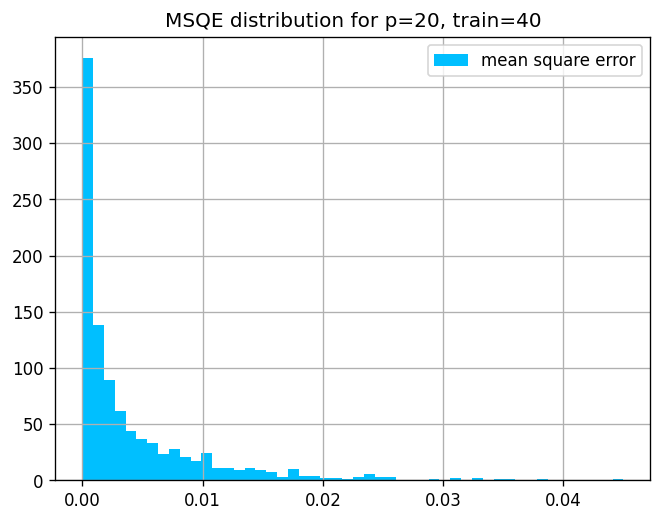

The thetas with which the values were simulated are: [0.02419153 0.01259249 0.06061261 0.01610254 0.06510137 0.11383634
 0.09343263 0.04635713 0.02466959 0.09935434 0.05910281 0.03444884
 0.01640928 0.03581268 0.0212286  0.10408611 0.02930562 0.05950875
 0.02564721 0.05819954]
Mean square error for 100 #train is 2.726


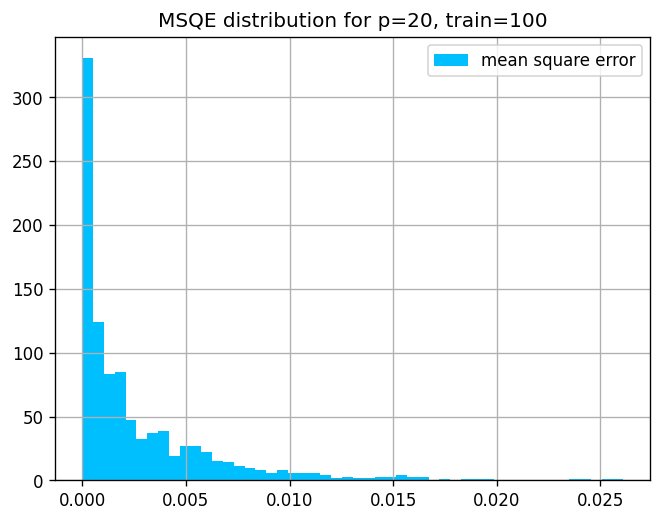

The thetas with which the values were simulated are: [0.00450697 0.00097808 0.02388473 0.06802151 0.07587372 0.07560013
 0.077333   0.01153804 0.04426816 0.05554897 0.06670224 0.05587486
 0.06641084 0.10543705 0.05718418 0.01822988 0.01018608 0.04135596
 0.0895838  0.05148181]
Mean square error for 200 #train is 2.523


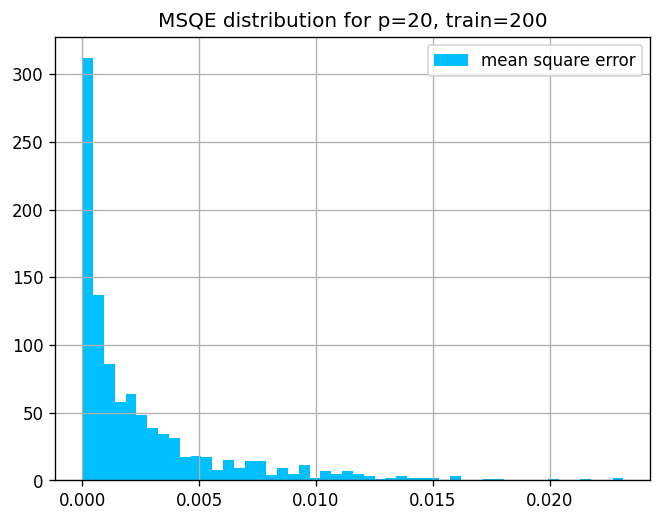

The thetas with which the values were simulated are: [0.06456745 0.04768857 0.06701649 0.0186675  0.0295715  0.02277382
 0.00744643 0.0605478  0.07317796 0.04740593 0.02907936 0.04415628
 0.03739684 0.03627103 0.02677676 0.03602949 0.07355135 0.08030902
 0.00796683 0.01539651 0.07346591 0.0229978  0.02781563 0.03299109
 0.01693267]
Mean square error for 10 #train is 4.741


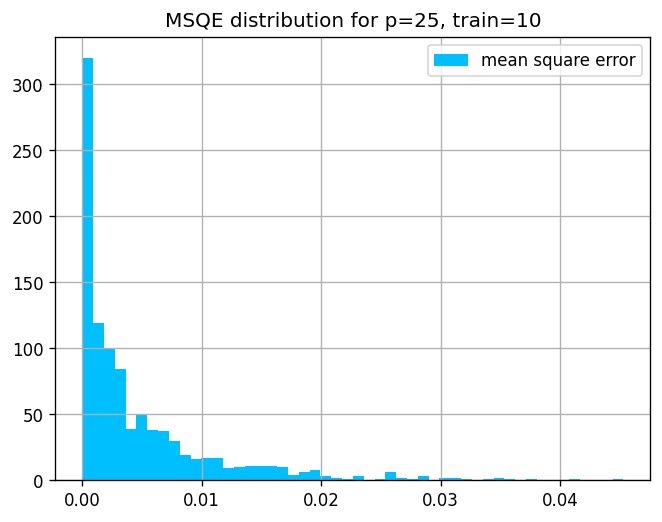

The thetas with which the values were simulated are: [0.04517307 0.04050506 0.0414597  0.06004037 0.06698644 0.00915319
 0.02461481 0.01491649 0.05674504 0.0625346  0.02535713 0.04052693
 0.04768683 0.04763343 0.06752155 0.04701134 0.04524189 0.03657829
 0.06464441 0.04369161 0.01530447 0.00079449 0.06200867 0.02798046
 0.0058897 ]
Mean square error for 40 #train is 7.145


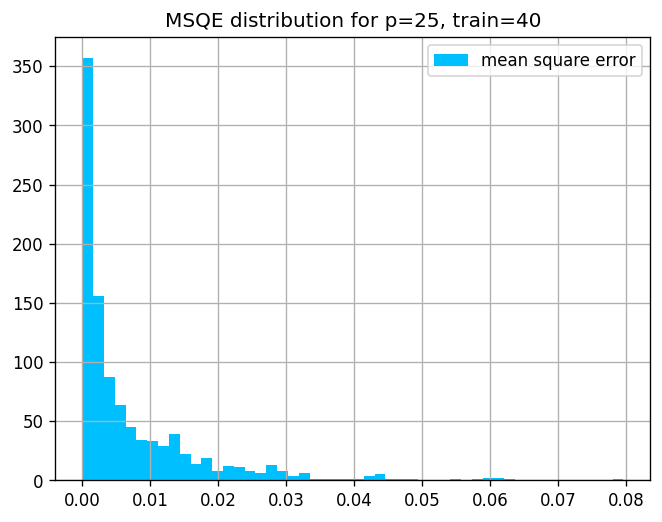

The thetas with which the values were simulated are: [0.05286518 0.0657223  0.01079844 0.04230778 0.01969529 0.05457985
 0.02523864 0.02201649 0.04923697 0.04770324 0.06703099 0.00984028
 0.04479091 0.01015199 0.04964032 0.0393161  0.0377668  0.05224842
 0.01998173 0.06729183 0.04185695 0.06774177 0.0133046  0.06237168
 0.02650145]
Mean square error for 100 #train is 3.311


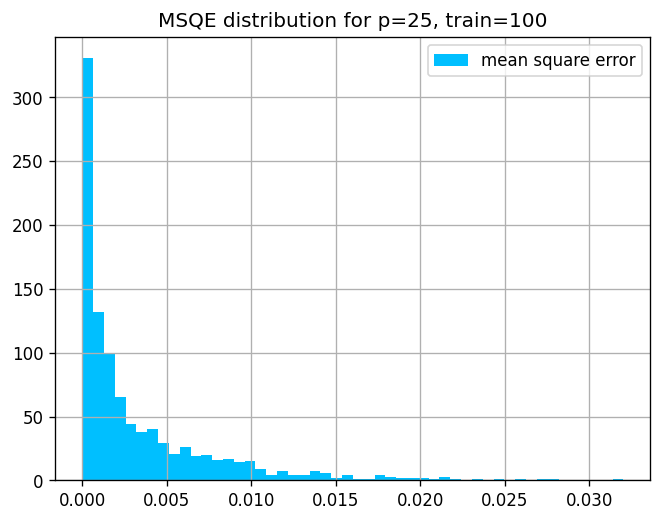

The thetas with which the values were simulated are: [0.05531197 0.02947215 0.05784451 0.04597073 0.05725743 0.02762109
 0.03204492 0.04513834 0.05548337 0.02810203 0.00195455 0.05681663
 0.06022075 0.01115157 0.04157066 0.00679282 0.05581387 0.06032399
 0.01679355 0.03911293 0.02139718 0.0398062  0.05017049 0.05166094
 0.05216733]
Mean square error for 200 #train is 2.612


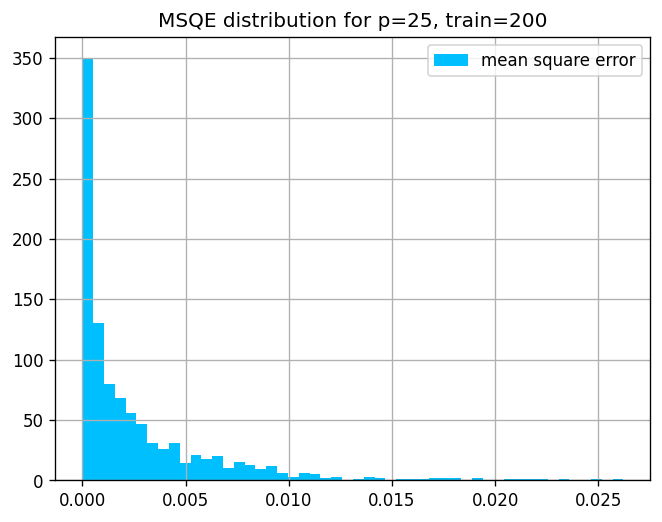

The thetas with which the values were simulated are: [0.06849984 0.02348433 0.05595627 0.01157063 0.02312304 0.0680323
 0.02134353 0.01951724 0.06106244 0.03967326 0.04147341 0.01501367
 0.06556281 0.04427796 0.05015327 0.00309974 0.0207396  0.05461659
 0.02603727 0.03869841 0.00756369 0.00603116 0.03132086 0.03332838
 0.02426591 0.01567948 0.00946551 0.05705371 0.06335568]
Mean square error for 10 #train is 4.071


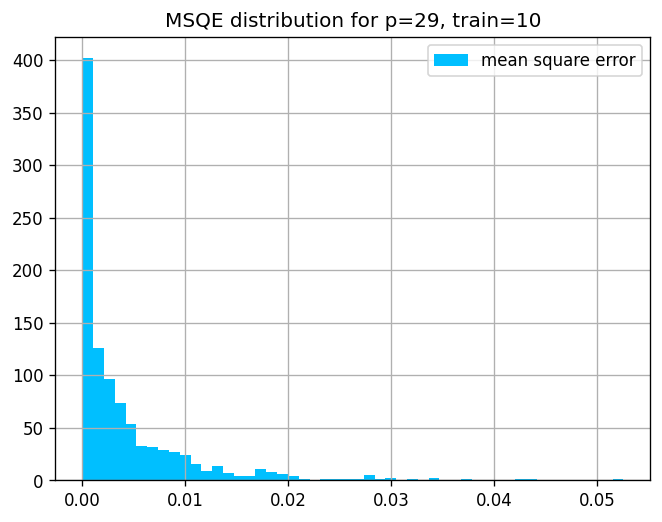

The thetas with which the values were simulated are: [0.0060769  0.03695276 0.02742219 0.02129903 0.07039211 0.02133016
 0.0250777  0.04276028 0.04765401 0.05064027 0.05268575 0.01583401
 0.04733694 0.01424951 0.00697568 0.01782534 0.06314707 0.04080788
 0.05319901 0.00414918 0.02111856 0.01801672 0.03961845 0.06310165
 0.04558714 0.04148257 0.05225886 0.04607509 0.00692518]
Mean square error for 40 #train is 11.163


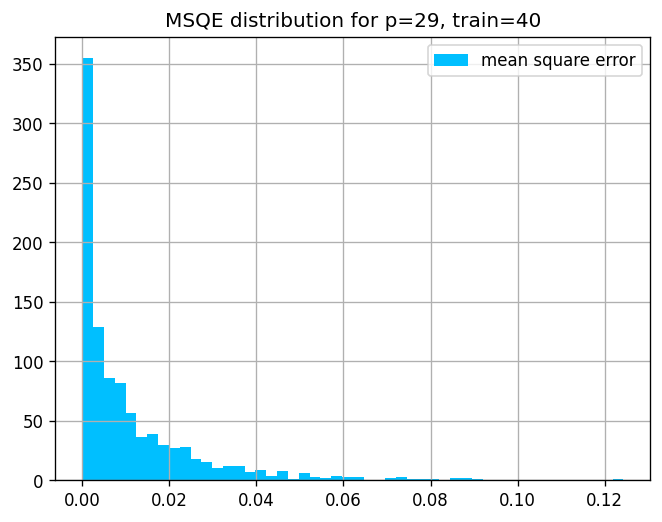

The thetas with which the values were simulated are: [0.03113443 0.00742101 0.02445696 0.06088461 0.04920236 0.0195046
 0.05330311 0.04232806 0.01169389 0.05716282 0.02790783 0.02344063
 0.05432829 0.00169707 0.03443684 0.04086509 0.03862334 0.04098126
 0.05508032 0.04035302 0.00812214 0.04294753 0.06073574 0.0274196
 0.01401635 0.01859231 0.03738618 0.05314507 0.02282952]
Mean square error for 100 #train is 3.152


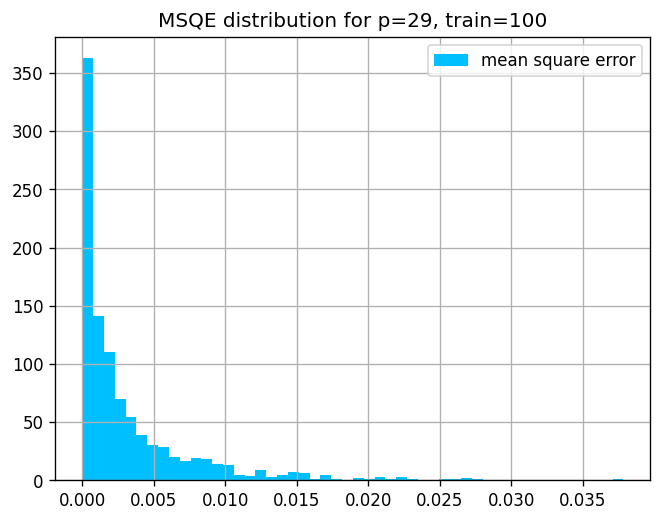

The thetas with which the values were simulated are: [0.06655626 0.03462    0.01001559 0.00645428 0.04497628 0.03711694
 0.05593429 0.03428517 0.03279264 0.02141117 0.06123929 0.04869639
 0.02931858 0.00974171 0.0058232  0.0422045  0.03937615 0.00721845
 0.04404521 0.05698721 0.07075709 0.0178118  0.02697242 0.05052775
 0.00976715 0.03735556 0.02938782 0.02341774 0.04518937]
Mean square error for 200 #train is 2.785


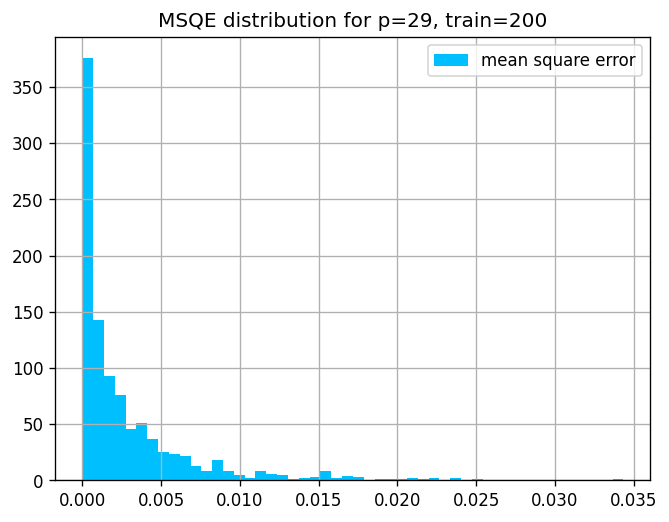

In [5]:
# fonction qui reprend les Q1 et 2

n_train = 30
n_test = 1000
p = 10

def testeur(n_train, n_test, p):
    [X_l, y_l, X_t, y_t, RefTheta] = SimulateObservations2(n_train, n_test, p)

    # linear regression and prediction
    lr = LinearRegression()
    lr.fit(X_l, y_l)
    y_t_hat = lr.predict(X_t)

    # error
    msqr = s2(y_t, y_t_hat)
    print(f"Mean square error for {n_train} #train is {round(msqr, 3)}")

    if False :
        plt.figure(dpi=120)
        plt.scatter(y_t, y_t_hat, color="orangered", label="prediction vs truth")
        plt.legend()
        plt.grid()
        plt.title(f'prediction on {var}')
        plt.show()
    return y_t, y_t_hat

def erreur(y_t, y_t_hat, n_train, n_test, p):
    err2 = (y_t - y_t_hat)**2 / (len(y_t)-1)
    plt.figure(dpi=120)
    plt.hist(err2, bins=50, color="deepskyblue", label=f"mean square error")
    plt.legend()
    plt.grid()
    plt.title(f'MSQE distribution for p={p}, train={n_train}')
    plt.show()

P = [5, 10, 20, 25, 29]
N = [10, 40, 100, 200]

for p in P :
    for n in N :
        yt, y_hat = testeur(n, n_test, p)
        erreur(yt, y_hat, n, n_test, p)
